**Task-1: TITANIC SURVIVAL PREDICTION**

Author: Dev Nayee

Batch: MARCH BATCH A41

Domain: Data Science

Aim: To build a model that predicts whether a passenger on the Titanic survived or not.

In [1]:
#IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Titanic dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# Change column name from 'Sex' to 'Gender'
titanic_data.rename(columns={'Sex': 'Gender'}, inplace=True)

In [4]:
# Rearrange columns
titanic_data = titanic_data[['PassengerId','Name','Age', 'Gender', 'Ticket', 'Pclass', 'Fare', 'Cabin','Survived']]

In [5]:
# Display the first 891 rows with the specified column order
titanic_data.head(891)

,PassengerId,Name,Age,Gender,Ticket,Pclass,Fare,Cabin,Survived
0,1,"Braund, Mr. Owen Harris",22.0,male,A/5 21171,3,7.2500,NaN,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,PC 17599,1,71.2833,C85,1
2,3,"Heikkinen, Miss. Laina",26.0,female,STON/O2. 3101282,3,7.9250,NaN,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,113803,1,53.1000,C123,1
4,5,"Allen, Mr. William Henry",35.0,male,373450,3,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,male,211536,2,13.0000,NaN,0
887,888,"Graham, Miss. Margaret Edith",19.0,female,112053,1,30.0000,B42,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female,W./C. 6607,3,23.4500,NaN,0
889,890,"Behr, Mr. Karl Howell",26.0,male,111369,1,30.0000,C148,1


In [6]:
titanic_data.shape

(891, 9)

In [7]:
#data-type info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Age          714 non-null    float64
 3   Gender       891 non-null    object 
 4   Ticket       891 non-null    object 
 5   Pclass       891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [8]:
titanic_data.describe()

,PassengerId,Age,Pclass,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,2.308642,32.204208,0.383838
std,257.353842,14.526497,0.836071,49.693429,0.486592
min,1.000000,0.420000,1.000000,0.000000,0.000000
25%,223.500000,20.125000,2.000000,7.910400,0.000000
50%,446.000000,28.000000,3.000000,14.454200,0.000000
75%,668.500000,38.000000,3.000000,31.000000,1.000000
max,891.000000,80.000000,3.000000,512.329200,1.000000


**From above cell it is clear there there are few missing values in age column**

In [9]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

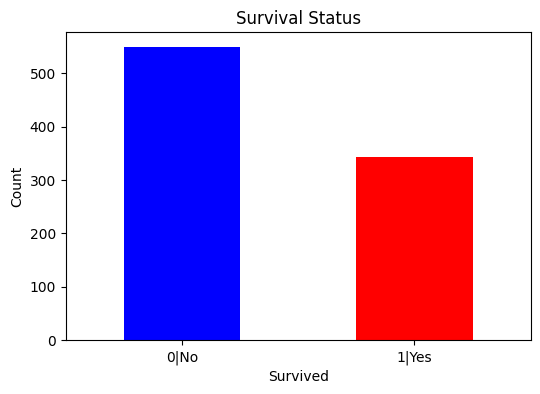

In [10]:
# Visualize survival status
plt.figure(figsize=(6, 4))
survival_counts = titanic_data['Survived'].value_counts()
survival_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Status')
plt.xticks(rotation=0, ticks=[0, 1], labels=['0|No', '1|Yes'])
plt.show()

In [11]:
# Drop non-numeric columns
numeric_titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
# Convert 'Gender' column to numeric representation
numeric_titanic_data['Gender'] = numeric_titanic_data['Gender'].map({'male': 0, 'female': 1})

In [13]:
# Fill NaN values in 'Survived' column with median value
median_survived = numeric_titanic_data['Survived'].median()
numeric_titanic_data['Survived'].fillna(median_survived, inplace=True)

In [14]:
# Calculate correlation matrix
correlation_matrix = numeric_titanic_data.corr()

In [15]:
# Display correlation matrix as a table
print("\033[1mCorrelation Matrix:\033[0m")
print(correlation_matrix)

Correlation Matrix:
             PassengerId       Age    Gender    Pclass      Fare  Survived
PassengerId     1.000000  0.036847 -0.042939 -0.035144  0.012658 -0.005007
Age             0.036847  1.000000 -0.093254 -0.369226  0.096067 -0.077221
Gender         -0.042939 -0.093254  1.000000 -0.131900  0.182333  0.543351
Pclass         -0.035144 -0.369226 -0.131900  1.000000 -0.549500 -0.338481
Fare            0.012658  0.096067  0.182333 -0.549500  1.000000  0.257307
Survived       -0.005007 -0.077221  0.543351 -0.338481  0.257307  1.000000


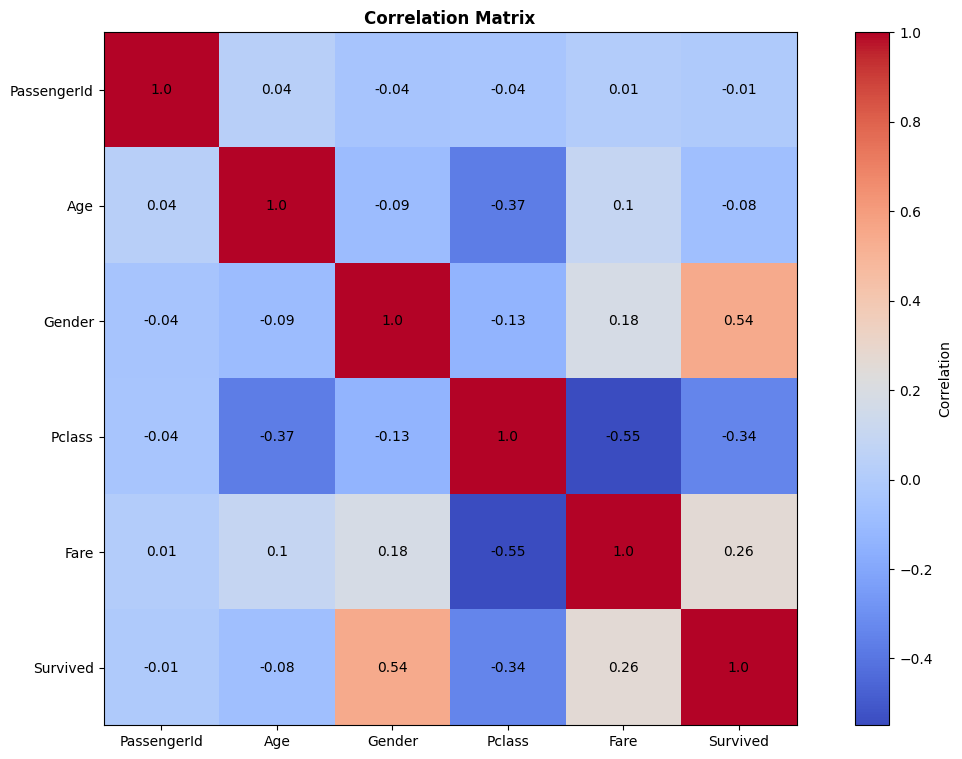

In [16]:
# Plot correlation matrix
plt.figure(figsize=(15,9))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add correlation values as annotations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, round(correlation_matrix.iloc[i, j], 2), ha='center', va='center', color='black')

plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='horizontal')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

In [17]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

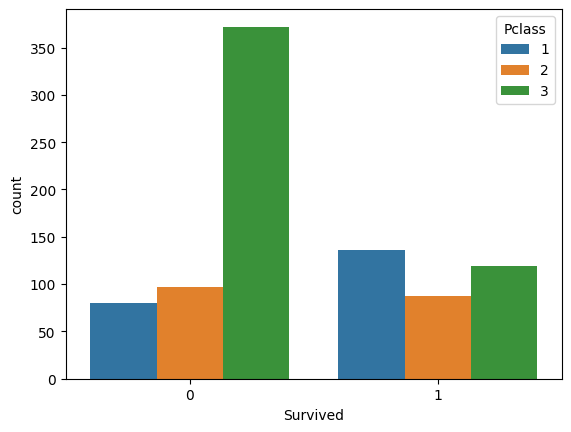

In [18]:
#let's visualize the count of survivals wrt pclass
import seaborn as sns
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])

In [19]:
titanic_data["Gender"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Gender, Length: 891, dtype: object

<Axes: xlabel='Gender', ylabel='count'>

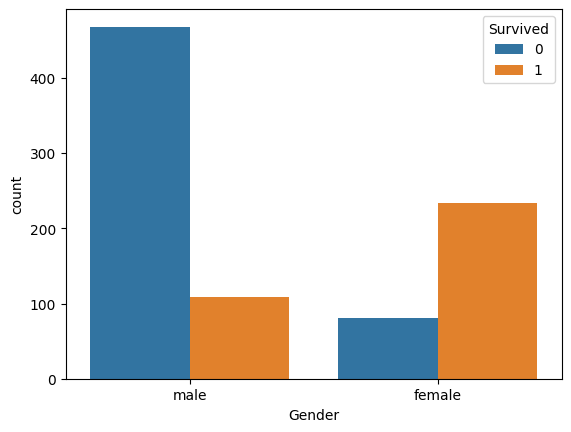

In [20]:
#let's visualize the count of survivals wrt Gender
sns.countplot(x=titanic_data['Gender'], hue=titanic_data['Survived'])

In [21]:
#Look at survival rate by sex
titanic_data.groupby('Gender')[['Survived']].mean()

,Survived
Gender,
female,0.742038
male,0.188908


In [22]:
titanic_data['Gender'].unique()

array(['male', 'female'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic_data['Gender']= labelencoder.fit_transform(titanic_data['Gender'])

titanic_data.head()

,PassengerId,Name,Age,Gender,Ticket,Pclass,Fare,Cabin,Survived
0,1,"Braund, Mr. Owen Harris",22.0,1,A/5 21171,3,7.2500,NaN,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,0,PC 17599,1,71.2833,C85,1
2,3,"Heikkinen, Miss. Laina",26.0,0,STON/O2. 3101282,3,7.9250,NaN,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,0,113803,1,53.1000,C123,1
4,5,"Allen, Mr. William Henry",35.0,1,373450,3,8.0500,NaN,0


In [24]:
titanic_data['Gender']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Gender, Length: 891, dtype: int32

In [25]:
titanic_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

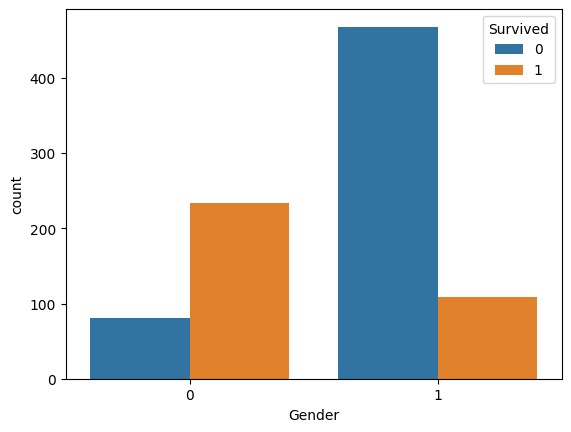

In [26]:
sns.countplot(x=titanic_data['Gender'], hue=titanic_data["Survived"])

In [27]:
titanic_data.isna().sum()

PassengerId      0
Name             0
Age            177
Gender           0
Ticket           0
Pclass           0
Fare             0
Cabin          687
Survived         0
dtype: int64

In [28]:
# After dropping non required column
df=titanic_data.drop(['Age'], axis=1)

In [29]:
df_final = df
df_final.head(10)

,PassengerId,Name,Gender,Ticket,Pclass,Fare,Cabin,Survived
0,1,"Braund, Mr. Owen Harris",1,A/5 21171,3,7.2500,NaN,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,1,71.2833,C85,1
2,3,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,3,7.9250,NaN,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,1,53.1000,C123,1
4,5,"Allen, Mr. William Henry",1,373450,3,8.0500,NaN,0
5,6,"Moran, Mr. James",1,330877,3,8.4583,NaN,0
6,7,"McCarthy, Mr. Timothy J",1,17463,1,51.8625,E46,0
7,8,"Palsson, Master. Gosta Leonard",1,349909,3,21.0750,NaN,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,347742,3,11.1333,NaN,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",0,237736,2,30.0708,NaN,1


**MODEL TRAINING**

In [30]:
X= df[['Pclass', 'Gender']]
Y=df['Survived']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

**MODEL PREDICTION**

In [33]:
pred = print(log.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [34]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [35]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,0]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

Survived


In [36]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,1]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived
